In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

## This notebook is for exploratory of the asthma disease data

In [95]:
# Load the dataset
file_path = '/data/asthma_disease_data.csv'  # Adjust the path as necessary
asthma_data = pd.read_csv(file_path)

# Display the first few rows
asthma_data.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [96]:
def custom_snake_case(name):
    """Converts a name to snake_case, handling abbreviations and capitalization.

    Args:
        name: The name to be converted.

    Returns:
        The name in snake_case format.
    """

    # Replace capital letters that are not part of abbreviations with an underscore followed by the lowercase letter
    name = re.sub(r'(?<![A-Z])([A-Z])', r'_\1', name).lower()

    # Handle abbreviations by preserving consecutive capital letters
    name = re.sub(r'([A-Z]+)([A-Z][a-z])', r'\1_\2', name)

    # Remove leading underscore if present
    if name.startswith('_'):
        name = name[1:]

    return name

# Apply the function to all column names
asthma_data.columns = asthma_data.columns.map(custom_snake_case)

# Display the new column names
asthma_data.columns

Index(['patient_id', 'age', 'gender', 'ethnicity', 'education_level', 'bmi',
       'smoking', 'physical_activity', 'diet_quality', 'sleep_quality',
       'pollution_exposure', 'pollen_exposure', 'dust_exposure', 'pet_allergy',
       'family_history_asthma', 'history_of_allergies', 'eczema', 'hay_fever',
       'gastroesophageal_reflux', 'lung_function_fev1', 'lung_function_fvc',
       'wheezing', 'shortness_of_breath', 'chest_tightness', 'coughing',
       'nighttime_symptoms', 'exercise_induced', 'diagnosis',
       'doctor_in_charge'],
      dtype='object')

In [97]:
# Check for missing values
missing_values = asthma_data.isnull().sum()

# Data types
data_types = asthma_data.dtypes

# Display the information
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)

# Check for duplicate rows
duplicates = asthma_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Summary statistics
summary_stats = asthma_data.describe().T
summary_stats

Missing Values:
 patient_id                 0
age                        0
gender                     0
ethnicity                  0
education_level            0
bmi                        0
smoking                    0
physical_activity          0
diet_quality               0
sleep_quality              0
pollution_exposure         0
pollen_exposure            0
dust_exposure              0
pet_allergy                0
family_history_asthma      0
history_of_allergies       0
eczema                     0
hay_fever                  0
gastroesophageal_reflux    0
lung_function_fev1         0
lung_function_fvc          0
wheezing                   0
shortness_of_breath        0
chest_tightness            0
coughing                   0
nighttime_symptoms         0
exercise_induced           0
diagnosis                  0
doctor_in_charge           0
dtype: int64

Data Types:
 patient_id                   int64
age                          int64
gender                       int64
ethnicity 

,count,mean,std,min,25%,50%,75%,max
patient_id,2392.0,6229.500000,690.655244,5034.000000,5631.750000,6229.500000,6827.250000,7425.000000
age,2392.0,42.137960,21.606655,5.000000,23.000000,42.000000,61.000000,79.000000
gender,2392.0,0.493311,0.500060,0.000000,0.000000,0.000000,1.000000,1.000000
ethnicity,2392.0,0.669732,0.986120,0.000000,0.000000,0.000000,1.000000,3.000000
education_level,2392.0,1.307274,0.898242,0.000000,1.000000,1.000000,2.000000,3.000000
bmi,2392.0,27.244877,7.201628,15.031803,20.968313,27.052202,33.555903,39.985611
smoking,2392.0,0.141722,0.348838,0.000000,0.000000,0.000000,0.000000,1.000000
physical_activity,2392.0,5.051786,2.903574,0.001740,2.578333,5.016881,7.540234,9.995809
diet_quality,2392.0,5.022867,2.909980,0.003031,2.432043,5.115383,7.544216,9.999904
sleep_quality,2392.0,7.019012,1.732475,4.001437,5.498500,6.975839,8.526950,9.996235


Binary variables (0/1) are: Gender, Smoking, PetAllergy, variables related to medical history (FamilyHistoryAsthma, HistoryOfAllergies, HistoryOfAllergies, Eczema, HayFever, GastroesophagealReflux), variables related to symptoms (Wheezing, ShortnessOfBreath, ChestTightness, Coughing, NighttimeSymptoms, ExerciseInduced, Diagnosis) 

Scored from 0 to 10 are columns:
PhysicalActivity,
DietQuality,
SleepQuality,
PollutionExposure,
PollenExposure,
DustExposure,

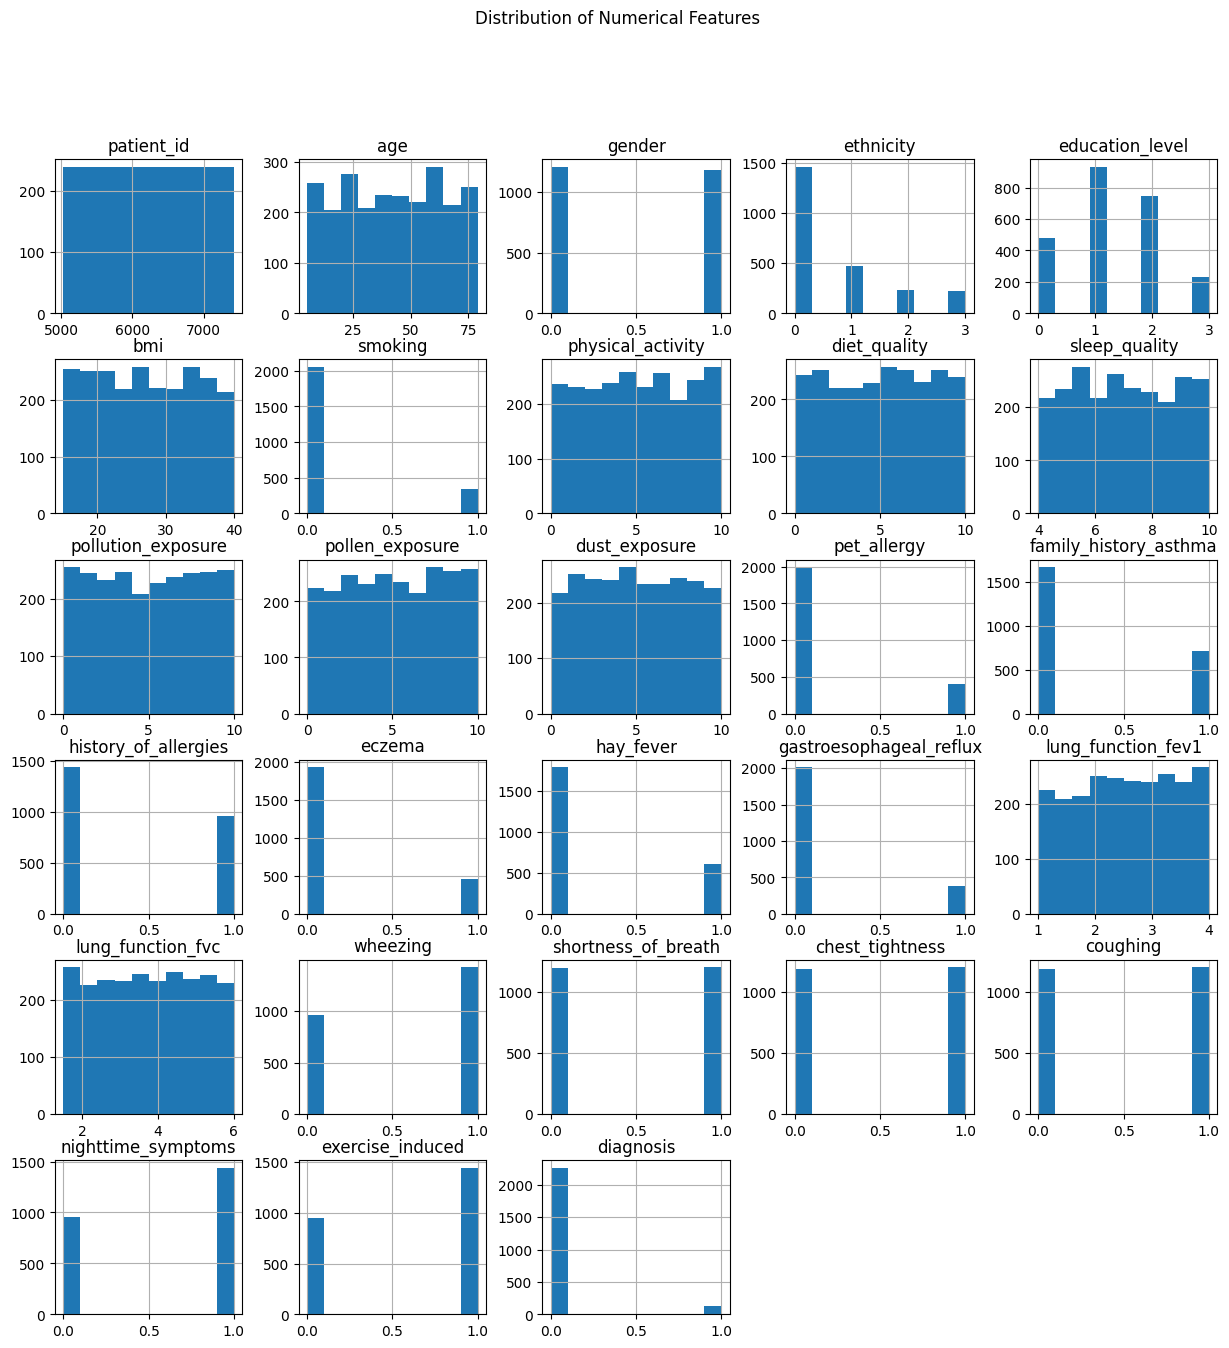

In [98]:
# Plot histograms for all numerical features
asthma_data.hist(figsize=(15, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [99]:
asthma_data.patient_id.unique()

array([5034, 5035, 5036, ..., 7423, 7424, 7425])

In [100]:
asthma_data.doctor_in_charge.unique()

#ruduntant column, contains repeating string

array(['Dr_Confid'], dtype=object)

In [101]:
# Summary of the distribution of genders
asthma_data.gender.value_counts()

gender
0    1212
1    1180
Name: count, dtype: int64

In [102]:
# Summary distribution of smoking (0) and non-smoking (1), from all diagnosed with asthma
asthma_data[asthma_data.diagnosis == 1].smoking.value_counts()

smoking
0    110
1     14
Name: count, dtype: int64

In [103]:
# Summary of the distribution of the target variable
asthma_data.diagnosis.value_counts()

diagnosis
0    2268
1     124
Name: count, dtype: int64

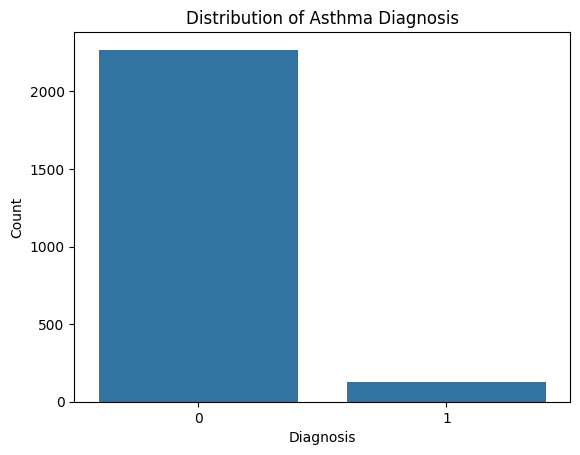

In [104]:
# Distribution of the target variable
sns.countplot(x='diagnosis', data=asthma_data)
plt.title('Distribution of Asthma Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
#graph showing that majority is free from asthma

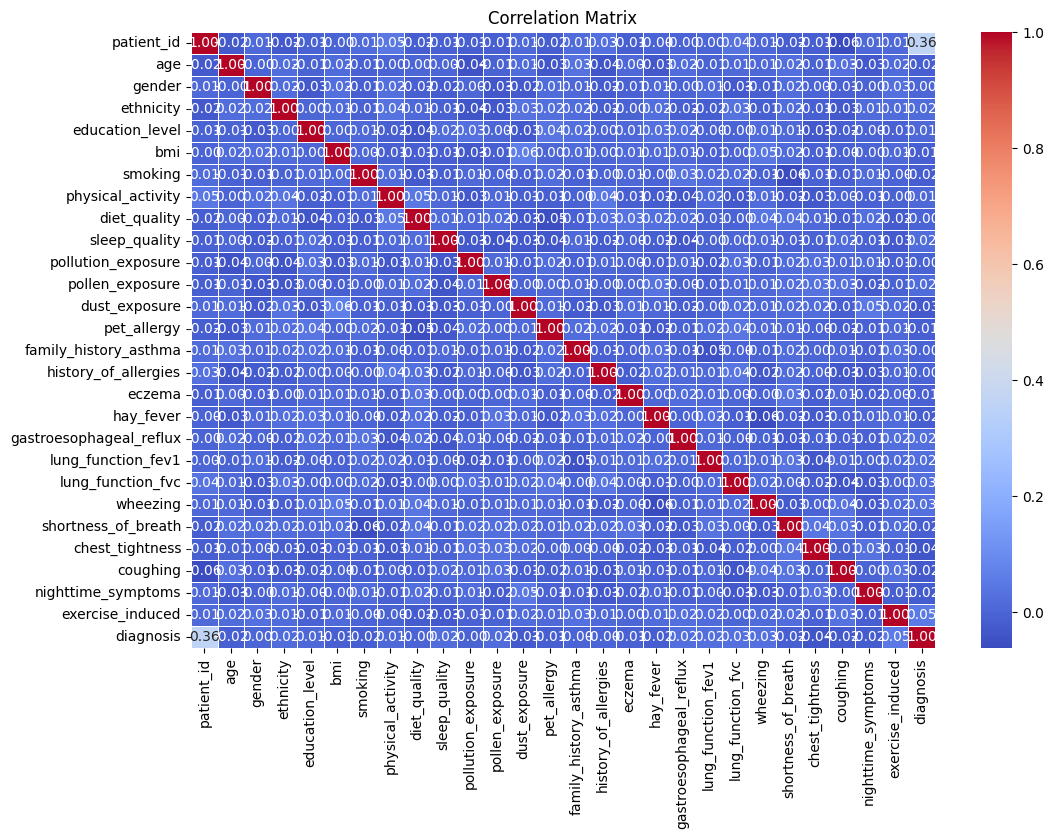

In [105]:
# Correlation matrix
# Exclude non-numeric columns
numeric_data = asthma_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

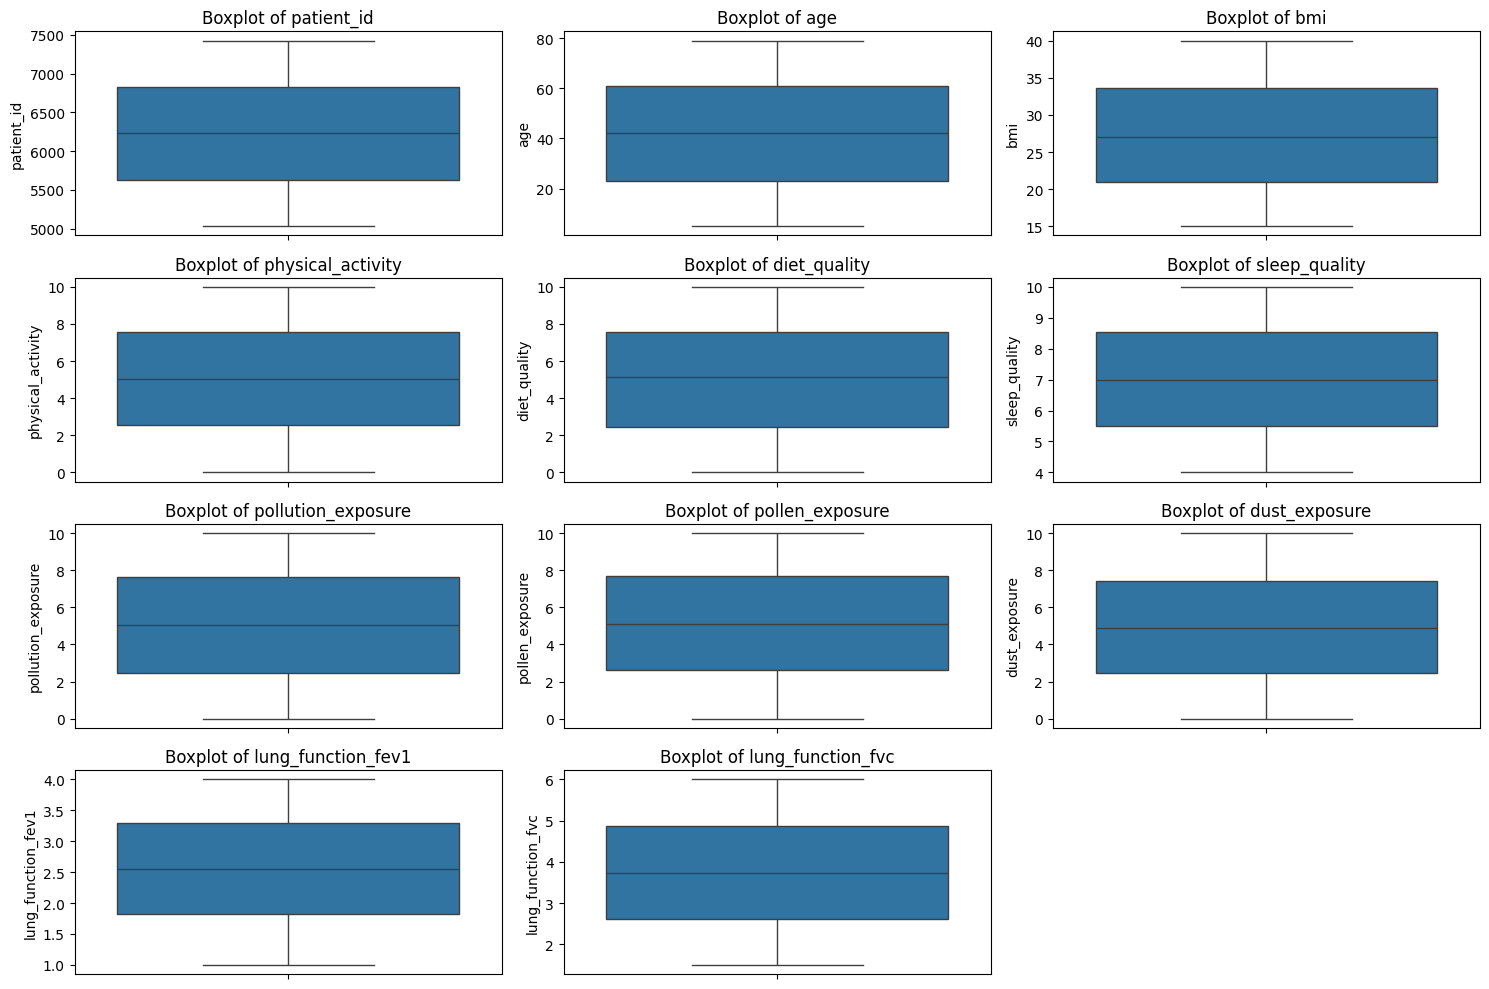

In [106]:
#Check for outliers
# Select columns that are relevant for outlier detection (numeric columns)
columns_to_check = ['patient_id', 'age', 'bmi', 'physical_activity', 'diet_quality', 'sleep_quality', 
                    'pollution_exposure', 'pollen_exposure', 'dust_exposure', 
                    'lung_function_fev1', 'lung_function_fvc']

# Create a boxplot for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)  # Adjust grid size based on the number of columns
    sns.boxplot(data=asthma_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [108]:
asthma_data.to_pickle('asthma_data.pkl')